In [1]:
from tqdm import tqdm

from lib import mut, plot

from lib.dataloader import load_synthetic
from lib.task import make_tasks

from lib.solver.anneal_solver import AnnealSolver
from lib.temperature import exponential

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
data = load_synthetic('../generated_graphs.csv')

tasks = make_tasks(data.values())
tasks1000 = [task for task in tasks if len(task.trace.candidates) == 1000]
tasks2000 = [task for task in tasks if len(task.trace.candidates) == 2000]
tasks4000 = [task for task in tasks if len(task.trace.candidates) == 4000]

len(tasks1000), len(tasks2000), len(tasks4000)

(500, 250, 100)

In [4]:
solver = AnnealSolver(
    mutation=mut.GreedyMakeBusyAll(),
    epoches=1,
    temp=exponential(10000, 1.0005),
    beamsearch_size=2,
)

100%|██████████| 100/100 [00:12<00:00,  7.87it/s]


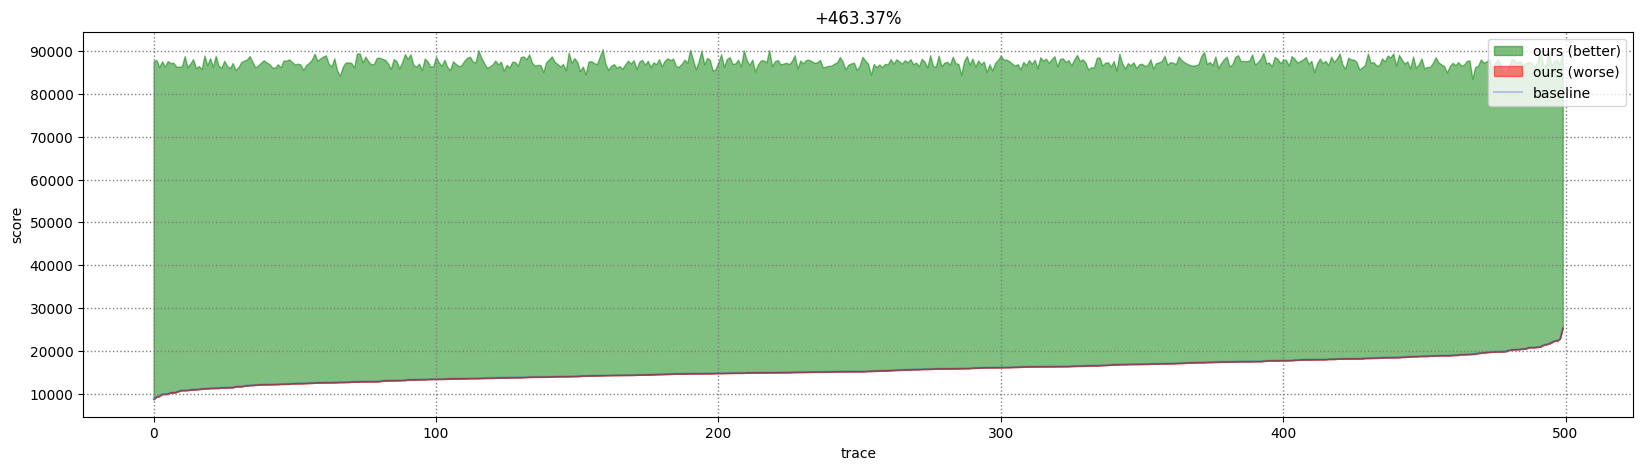

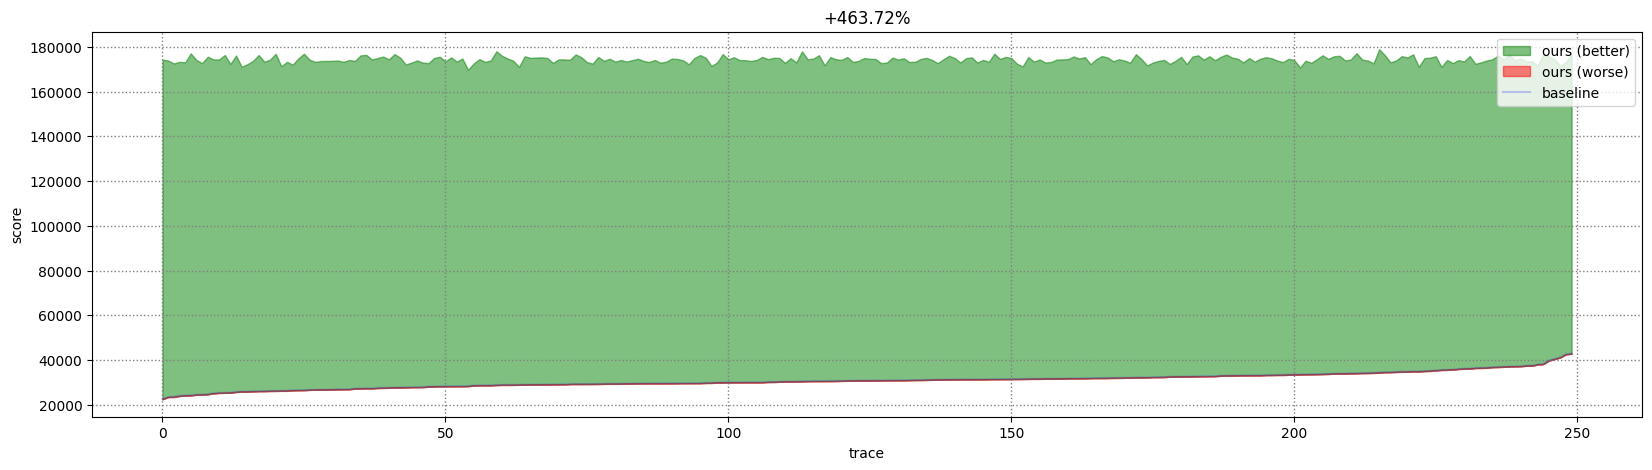

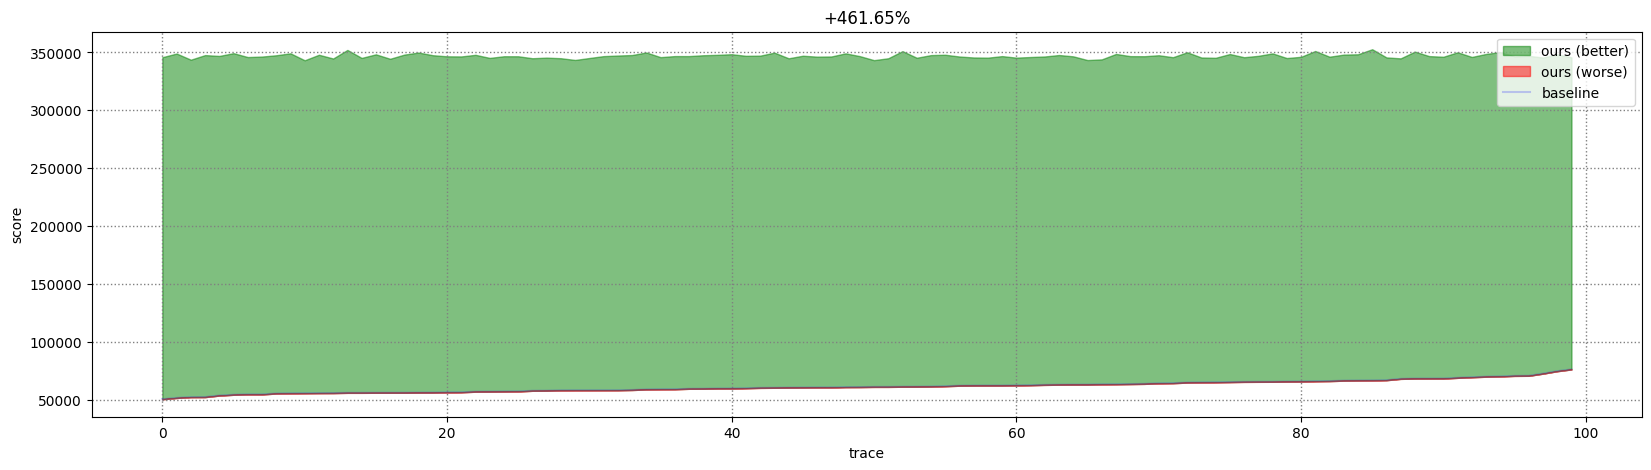

In [5]:
for tasksn in [tasks1000, tasks2000, tasks4000]:
    solver.solve_all(*tasksn, tqdm=tqdm)
    plot.total_diff(*tasksn, last_n=1, figsize=(20, 5))